# Analyse der Tweets von Bundestagsabgeordneten
## 1. Dataset preparation

In [ ]:
import pymongo

client = pymongo.MongoClient("mongodb://localhost:27017/")

db = client['Twitter']
All_Tweets_collection = db['twitter_mdp_ex_date_proj']


In [ ]:
import pandas as pd
import pymongo
import datetime

pd.set_option('display.max_colwidth', 0)

# sample_df = pd.DataFrame(list(All_Tweets_collection.aggregate([ {"$sample": {"size": 50 }}], 
#                                      allowDiskUse=True
#                                    )))

time_sample_df = pd.DataFrame(list(All_Tweets_collection.find( {
            'created_at_datetime': {'$gte': datetime.datetime(2020,1,1,0,0,0),
                                    '$lt': datetime.datetime(2020,5,31,0,0,0)},
            'retweeted_id': None
            })
        ))

##### Text Cleaning

In [ ]:
# Load the regular expression library
pd.set_option('display.max_colwidth', 0)
import re

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F900-\U0001F9FF"  # https://www.compart.com/de/unicode/block/U+1F900
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

sample_df = time_sample_df
# Remove punctuation
sample_df.loc[:,('full_text_processed')] = sample_df.loc[:,('full_text')].map(lambda x: re.sub('[,\.!?#@\\n"“„\:;&\(\)]', '', x))
# Remove Links
sample_df.loc[:,('full_text_processed')] = sample_df.loc[:,('full_text_processed')].map(lambda x: re.sub('http.*', '', x))

sample_df.loc[:,('full_text_processed')] = sample_df.loc[:,('full_text_processed')].map(lambda x: re.sub('amp', '', x))
# Convert the titles to lowercase
#sample_df['full_text_processed'] = sample_df['full_text_processed'].map(lambda x: x.lower())

#sample_df['full_text_processed'] = sample_df['full_text_processed'].map(lambda x: remove_emoji(x))
# Print out the first rows of papers
sample_df['full_text_processed'].head(200)

##### Durchsuche Datensatz nach bestimmten Tweets und sortiere aus

In [ ]:
# Print words that match certain words:
#sample_df['full_text_processed'][sample_df['full_text_processed'].str.match(r'.*brexit.*')==True]

# Remove Tweets that match certain words:
# sample_df = sample_df[~sample_df.full_text_processed.str.contains("fröhlicher gruss")]
# sample_df.groupby('user_party').size()

##### Stopwords

In [ ]:
#from stop_words import get_stop_words
#stop_words = get_stop_words('de')

import stopwordsiso as stopwords
stop_words = list(stopwords.stopwords(["de"])) 

mehr_sw = ['der', 'die', 'das', 'Das', 'the', 'ist' 'es', 'gibt', 'und', 'für', 'auf', 'aus', 'mit', 'dem', 'tb', 'cducsubt', 'spdbt', 'fdpbt', 'sdpde']
for word in mehr_sw:
    stop_words.append(word)
    


# Wordclouds
#### Basic

In [ ]:
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(sample_df['full_text_processed'])
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words, min_word_length=3)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

#### Wordcloud zu bestimmtem Zeitunkt

In [ ]:
from wordcloud import WordCloud

sample_df_date = sample_df.loc[(sample_df['created_at_datetime'] <= datetime.datetime(2019,6,8,0,0,0)) & (sample_df['created_at_datetime'] >= datetime.datetime(2019,5,15,0,0,0))]

# Join the different processed titles together.
long_string = ','.join(sample_df_date['full_text_processed'])
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words, min_word_length=3)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
plt.imshow(wordcloud)

### Wöchentliche Wordcloud - Union

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud

party = 'Union'
sample_df_partei = sample_df[sample_df.user_party == party]

sample_df_month = list(set(sample_df_partei['month']))
sample_df_month.sort()

date_dic_partei = {}
   
for month in sample_df_month:
    date_dic_partei[month] = sample_df_partei[sample_df_partei['month'] == month]

    
def FktWordCloud(long_string):
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words, min_word_length=4)
    wordcloud.generate(long_string)
    wordcloud.to_image()
    return wordcloud

fig = plt.figure(figsize = (18, 50))

for month, n in zip(date_dic_partei, range(1,len(date_dic_partei.keys())+1)):
    title = month

    ax = fig.add_subplot(14,3,n)
    ax.set_title(title,fontweight="bold", color='navy', size=20)
    fig.tight_layout()
    long_string = ','.join(date_dic_partei[month]['full_text_processed'])
    wordcloud = FktWordCloud(long_string)
    ax.imshow(wordcloud)
    ax.axis('off')

fig.suptitle(party + '_Tweets', fontsize=25, color='navy', y=1.01)

### Wöchentliche Wordcloud - AFD

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud

party = 'AFD'

sample_df_partei = sample_df[sample_df.user_party == party]

sample_df_month = list(set(sample_df_partei['month']))
sample_df_month.sort()

date_dic_partei = {}
   
for month in sample_df_month:
    date_dic_partei[month] = sample_df_partei[sample_df_partei['month'] == month]

    
def FktWordCloud(long_string):
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words, min_word_length=4)
    wordcloud.generate(long_string)
    wordcloud.to_image()
    return wordcloud

fig = plt.figure(figsize = (18, 50))

for month, n in zip(date_dic_partei, range(1,len(date_dic_partei.keys())+1)):
    title = month

    ax = fig.add_subplot(14,3,n)
    ax.set_title(title,fontweight="bold", color='navy', size=20)
    fig.tight_layout()
    long_string = ','.join(date_dic_partei[month]['full_text_processed'])
    wordcloud = FktWordCloud(long_string)
    ax.imshow(wordcloud)
    ax.axis('off')

fig.suptitle(party + '_Tweets', fontsize=25, color='navy', y=1.01)

### Wöchentliche Wordcloud - SPD

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud

party = 'SPD'

sample_df_partei = sample_df[sample_df.user_party == party]

sample_df_month = list(set(sample_df_partei['month']))
sample_df_month.sort()

date_dic_partei = {}
   
for month in sample_df_month:
    date_dic_partei[month] = sample_df_partei[sample_df_partei['month'] == month]

    
def FktWordCloud(long_string):
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words, min_word_length=4)
    wordcloud.generate(long_string)
    wordcloud.to_image()
    return wordcloud

fig = plt.figure(figsize = (18, 50))

for month, n in zip(date_dic_partei, range(1,len(date_dic_partei.keys())+1)):
    title = month

    ax = fig.add_subplot(14,3,n)
    ax.set_title(title,fontweight="bold", color='navy', size=20)
    fig.tight_layout()
    long_string = ','.join(date_dic_partei[month]['full_text_processed'])
    wordcloud = FktWordCloud(long_string)
    ax.imshow(wordcloud)
    ax.axis('off')

fig.suptitle(party + '_Tweets', fontsize=25, color='navy', y=1.01)

### Wöchentliche Wordcloud - Grüne

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud

party = 'Gruene'

sample_df_partei = sample_df[sample_df.user_party == party]

sample_df_month = list(set(sample_df_partei['month']))
sample_df_month.sort()

date_dic_partei = {}
   
for month in sample_df_month:
    date_dic_partei[month] = sample_df_partei[sample_df_partei['month'] == month]

    
def FktWordCloud(long_string):
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words, min_word_length=4)
    wordcloud.generate(long_string)
    wordcloud.to_image()
    return wordcloud

fig = plt.figure(figsize = (18, 50))

for month, n in zip(date_dic_partei, range(1,len(date_dic_partei.keys())+1)):
    title = month

    ax = fig.add_subplot(14,3,n)
    ax.set_title(title,fontweight="bold", color='navy', size=20)
    fig.tight_layout()
    long_string = ','.join(date_dic_partei[month]['full_text_processed'])
    wordcloud = FktWordCloud(long_string)
    ax.imshow(wordcloud)
    ax.axis('off')

fig.suptitle(party + '_Tweets', fontsize=25, color='navy', y=1.01)

### Wöchentliche Wordcloud - Linke

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud

party = 'Linke'

sample_df_partei = sample_df[sample_df.user_party == party]

sample_df_month = list(set(sample_df_partei['month']))
sample_df_month.sort()

date_dic_partei = {}
   
for month in sample_df_month:
    date_dic_partei[month] = sample_df_partei[sample_df_partei['month'] == month]

    
def FktWordCloud(long_string):
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words, min_word_length=4)
    wordcloud.generate(long_string)
    wordcloud.to_image()
    return wordcloud

fig = plt.figure(figsize = (18, 50))

for month, n in zip(date_dic_partei, range(1,len(date_dic_partei.keys())+1)):
    title = month

    ax = fig.add_subplot(14,3,n)
    ax.set_title(title,fontweight="bold", color='navy', size=20)
    fig.tight_layout()
    long_string = ','.join(date_dic_partei[month]['full_text_processed'])
    wordcloud = FktWordCloud(long_string)
    ax.imshow(wordcloud)
    ax.axis('off')

fig.suptitle(party + '_Tweets', fontsize=25, color='navy', y=1.01)

### Wöchentliche Wordcloud - FDP

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud

party = 'FDP'

sample_df_partei = sample_df[sample_df.user_party == party]

sample_df_month = list(set(sample_df_partei['month']))
sample_df_month.sort()

date_dic_partei = {}
   
for month in sample_df_month:
    date_dic_partei[month] = sample_df_partei[sample_df_partei['month'] == month]

    
def FktWordCloud(long_string):
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words, min_word_length=4)
    wordcloud.generate(long_string)
    wordcloud.to_image()
    return wordcloud

fig = plt.figure(figsize = (18, 50))

for month, n in zip(date_dic_partei, range(1,len(date_dic_partei.keys())+1)):
    title = month

    ax = fig.add_subplot(14,3,n)
    ax.set_title(title,fontweight="bold", color='navy', size=20)
    fig.tight_layout()
    long_string = ','.join(date_dic_partei[month]['full_text_processed'])
    wordcloud = FktWordCloud(long_string)
    ax.imshow(wordcloud)
    ax.axis('off')

fig.suptitle(party + '_Tweets', fontsize=25, color='navy', y=1.01)

#### Wordcloud Gegenüberstellung von Parteien

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud


sample_df_date = sample_df.loc[(sample_df['date'] == datetime.date(2020,5,8))]

partei_dic_date = {}
for partei in parteien:
    partei_dic_date['tweets_'+ partei] = sample_df_date[sample_df['user_party'] == partei]  


def FktWordCloud(long_string):
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words, min_word_length=3)
    wordcloud.generate(long_string)
    wordcloud.to_image()
    return wordcloud

fig = plt.figure(figsize = (16, 16))
#fig.subplots_adjust(top=0.8)

for partei, n in zip(partei_dic_date, range(1,7)):
    title = str(partei)
    
    ax = fig.add_subplot(5,3,n)
    ax.set_title(title,fontweight="bold", color='navy', size=20)
    fig.tight_layout()
    sample_df_partei=partei_dic_date[partei]
    long_string = ','.join(sample_df_partei['full_text_processed'])
    wordcloud = FktWordCloud(long_string)
    ax.imshow(wordcloud)
    ax.axis('off')
fig.suptitle('Tweets 8. Mai ohne Corona', fontsize=25, color='navy', y=1.05)

In [ ]:
sample_df[sample_df['date'] == datetime.date(2020,5,8)]

## Worthäufigkeiten

In [ ]:
partei_dic = {}
parteien = ['Union', 'SPD', 'Gruene', 'Linke', 'FDP', 'AFD']

for partei in parteien:
    partei_dic['tweets_'+ partei] = sample_df[sample_df['user_party'] == partei]  

In [ ]:
sample_df_samp = sample_df.loc[(sample_df['created_at_datetime'] < datetime.datetime(2020,6,1,0,0,0)) & (sample_df['created_at_datetime'] >= datetime.datetime(2020,1,1,0,0,0))]

sample_df_month_samp = list(set(sample_df_samp['month']))
sample_df_month_samp.sort()

month_dic = {}
   
for month in sample_df_month_samp:
    month_dic[month] = sample_df_samp[sample_df_samp['month'] == month]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

   
# Initialise the count vectorizer with the german stop words
count_vectorizer = CountVectorizer(stop_words=stop_words)


#fig = plt.figure(figsize = (16, 22))
for month, n in zip(sample_df_month_samp, range(1,len(sample_df_month_samp)+1)):
    #print(month)
    title = month
    
    # Fit and transform the processed titles
    count_data = count_vectorizer.fit_transform(month_dic[month]['full_text_processed'])
    
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))

# for t in count_data:
#     total_counts+=t.toarray()[0] # total_counts = total_counts + t.toarray
    
# count_dict = (zip(words, total_counts))
# count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0]
#     #count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    
# words = [w[0] for w in count_dict]
# counts = [w[1] for w in count_dict]
# x_pos = np.arange(len(words))
    
# with plt.xkcd():
#     ax = fig.add_subplot(5,3,n, title =  title)
#     fig.tight_layout()
#     ax = sns.barplot(x_pos, counts, palette="GnBu_d")
#     ax.set_xticklabels(words, rotation = 45, fontsize=13)
    
# # fig.suptitle('Häufigkeit von Begriffen über alle Parteien hinweg', fontsize=25, color='darkslategray', y=1.05)
# plt.show()


# Barplot

#### Barplot Gegenüberstellung

In [ ]:
#from stop_words import get_stop_words
#stop_words = get_stop_words('de')

import stopwordsiso as stopwords
stop_words = list(stopwords.stopwords(["de"])) 

mehr_sw = ['der', 'die', 'das', 'ist' 'es', 'gibt', 'und', 'für', 'auf', 'aus', 'mit', 'dem', 'tb', 'cducsubt', 'spdbt', 'fdpbt', 'sdpde'] 
           #'corona', 'covid19', 'coronakrise', 'coronavirus', 'krise']
for word in mehr_sw:
    stop_words.append(word)
    


In [ ]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer, title):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0] # total_counts = total_counts + t.toarray
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))
    
    with plt.xkcd():
        ax = fig.add_subplot(5,3,n, title =  title)
        fig.tight_layout()
        ax = sns.barplot(x_pos, counts, palette="GnBu_d")
        ax.set_xticklabels(words, rotation = 45, fontsize=13)
        return ax

    
# Initialise the count vectorizer with the german stop words
count_vectorizer = CountVectorizer(stop_words=stop_words)


fig = plt.figure(figsize = (16, 22))
for i, n in zip(weeks, range(1,16)):
    title = "%s - %s" % (bin_sum_per_week[n]['Von'].strftime('%d.%m.'),
                         bin_sum_per_week[n]['Bis'].strftime('%d.%m.%Y'))
    
    # Fit and transform the processed titles
    count_data = count_vectorizer.fit_transform(weeks[i]['full_text_processed'])
    plot_10_most_common_words(count_data, count_vectorizer, title)
    
fig.suptitle('Häufigkeit von Begriffen über alle Parteien hinweg', fontsize=25, color='darkslategray', y=1.05)
plt.show()


# Sentiment Analyse - Wörterbuch
## Simple TextBlob Analysis

In [ ]:
#import nltk
#nltk.download('punkt')
from textblob_de import TextBlobDE as TextBlob

blob = TextBlob(sample_df.full_text_processed[33504]) 

# print(blob.sentences)
# print(blob.tokens)
# print(blob.tags)
# print(blob.noun_phrases)
print(blob.sentiment)

In [ ]:
# https://medium.com/@himanshu_23732/sentiment-analysis-with-textblob-6bc2eb9ec4ab
def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None
    
sample_df['Polarity']     = sample_df['full_text_processed'].apply(sentiment).apply(lambda x: x[0])
sample_df['Subjectivity'] = sample_df['full_text_processed'].apply(sentiment).apply(lambda x: x[1])
sample_df.head()

In [ ]:
# compute sentiment scores (polarity) and labels
sentiment_scores = sample_df['Polarity']
sentiment_category = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores]


# sentiment statistics per news category
df_weeks = pd.DataFrame([list(sample_df['bins']), list(sample_df['user_party']), list(sentiment_scores), list(sentiment_category)]).T
df_weeks.columns = ['bins', 'partei', 'sentiment_score', 'sentiment_category']
df_weeks['sentiment_score'] = df_weeks.sentiment_score.astype('float')
df_weeks.groupby(by=['partei']).describe()

In [ ]:
len(weeks)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = []


for i, n in zip(weeks, range(1,len(weeks)+1)):
    label = "%s - %s" % (bin_sum_per_week[n]['Von'].strftime('%d.%m.'),
                         bin_sum_per_week[n]['Bis'].strftime('%d.%m.%Y'))
    labels.append(label)
    
ax = sns.catplot(x="bins", hue="sentiment_category", height=13,
                    data=df_weeks, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})
ax.set_xticklabels(labels, rotation = 45, fontsize=12)

#print(labels)

In [ ]:
ax = sns.catplot(x="partei", hue="sentiment_category", height=13,
                    data=df_weeks, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})
ax.set_xticklabels(rotation = 45, fontsize=12)

In [ ]:
partei_dic_sent = {}
for partei in parteien:
    partei_dic_sent['sentiment_'+ partei] = df_weeks[df_weeks['partei'] == partei]  
    
for i, n in zip(weeks, range(1,len(weeks)+1)):
    label = "%s - %s" % (bin_sum_per_week[n]['Von'].strftime('%d.%m.'),
                         bin_sum_per_week[n]['Bis'].strftime('%d.%m.%Y'))
    labels.append(label)

fig = plt.figure(figsize = (15, 18))

for partei, n in zip(parteien, range(1,7)):
    ax = fig.add_subplot(3,2,n, title = partei)
    fig.tight_layout()
    sns.catplot(x="bins", hue="sentiment_category", data=partei_dic_sent['sentiment_'+partei], kind="count", palette={"negative": "#FE2020", "positive": "#BADD07", "neutral": "#68BFF5"}, ax=ax)
    ax.set_xticklabels(labels, rotation = 45, fontsize=12, ha='right')
    plt.close(2)
    
fig.suptitle('Häufigkeit von von pos, neg und neut Tweets nach Parteien', fontsize=25, color='darkslategray', y=1.05)

In [ ]:
partei_dic_sent['sentiment_FDP']

## Basic Emotions
##### 1.) Erstellen der EmotionsMatrix

In dieser Matrix steht jede Zeile für ein deutsches Wort, welches den Wert 1 zugeschrieben bekommt, wenn eine der sieben "Basis Emotionen" damit verbunden ist.

In [ ]:
%%time
import pandas as pd
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from tqdm import tqdm


import csv
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', 0)
    
######### Erstelle Emotions-Matrix

filepath = '/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Lexicon_based/german-emotion-dictionary/fundamental/'
emo_df = []
words = []
emotion = ['Ekel', 'Freude', 'Furcht', 'Trauer', 'Ueberraschung', 'Verachtung', 'Wut']
emotion_list= {}
stemmer = SnowballStemmer("german")

for emo in emotion:
    with open(filepath + emo + '.txt', newline='\n') as f:
        reader = csv.reader(f)
        data = [item for sublist in reader for item in sublist] 
        emotion_list[str(emo)] = data
        words.extend(data)
        
words = list(set(words)) # remove Duplicates which come from overlapping EmotionLists
emo_df  = pd.DataFrame(index=words, columns=emotion)

words = []
for word in emo_df.index:
    for emo in emo_df.columns:
        if word in emotion_list[emo]:
            emo_df.at[word, emo] = 1
        else:
            emo_df.at[word, emo] = 0
    words.append(stemmer.stem(word.lower()))
 
emo_df.index= words
emo_df = emo_df.sort_index(ascending=True)
emo_df = pd.DataFrame(emo_df)
emo_df = emo_df.loc[~emo_df.index.duplicated(keep='first')]

emo_df.head()


##### Check ob bestimmtes Wort in Matrix enthalten ist

In [ ]:
emo_df.loc[emo_df.index == 'angst']

#### 2.) Anwendung der Emotions Matrix auf den Twitter Datensatz
Jedes Wort in jedem Tweet wird in der Matrix gesucht und ggf. der Vektor zurückgegeben. 
Siehe Kommentare

In [ ]:
%%time
#from fuzzywuzzy import fuzz
emo_base_df = sample_df['full_text_processed']
df_emo = pd.DataFrame(0, index=emo_base_df.index, columns=emotion)

for i in emo_base_df.index:
    document = word_tokenize(emo_base_df.loc[i])
    for word in document:
        word = stemmer.stem(word.lower())             # Stemming des einzelnen Wortes aus Tweet um es...
        emo_score = emo_df[emo_df.index == word]      # ... mit den Lexikon Worten zu vergleichen -> emo_score 

#         for w in emo_df.index:
#             fuz = fuzz.ratio(str(w), word)
#             if fuz > 98:
#                 emo_score = emo_df[emo_df.index == w].drop_duplicates(keep = 'first')    

        if not emo_score.empty:                       # der emo score eines Worts z.B. [0 0 1 1 0 0 0] 
            for emot in emotion:                      # wird zum Score des Tweets dazugezählt z.B.: [2 0 4 1 0 0 0]
                df_emo.at[i, emot] += emo_score[emot] # am Ende exisitiert zu einem Tweet ein 7-dim Vektor
                

emo_base_df = pd.concat([emo_base_df, df_emo], axis=1)

emo_base_df.head(20)

In [ ]:
emo_base_df.to_csv(index=False)

In [ ]:
#### Add Timestamp
# -> In Grafiken später mit abgebildet

emo_base_df['Partei'] = sample_df['user_party']
emo_base_df['created_at_datetime'] = sample_df['created_at_datetime']
emo_base_df.head(5)

##### Begrenze die Auswahl von relevanten Tweets -> emo_base_select

In [ ]:
emo_base_select = emo_base_df
# emo_base_select = emo_base_df[emo_base_df['full_text_processed'].str.match(r'.*((?i)corona|(?i)Covid).*')==True]
# len(emo_base_select[emo_base_select['Partei']=='Gruene'])
# len(emo_base_select)

####  3.) Remove empty full_text_processed
Wenn z.B. nur ein Link und emojis gepostet wurden ist nach dem text cleaning die Zelle leer (aber nicht isnull() == true)

In [ ]:
emo_base_text = emo_base_df.drop(emo_base_select[emo_base_select['full_text_processed']==''].index)
emo_base_text = emo_base_text.drop(emo_base_text[emo_base_text['full_text_processed']==' '].index)
emo_base_text = emo_base_text.drop(emo_base_text[emo_base_text['full_text_processed']=='  '].index)
emo_base_text = emo_base_text.drop(emo_base_text[emo_base_text['full_text_processed']=='   '].index)

In [ ]:
emo_party = emo_base_text.groupby('Partei').sum()
emo_party.head()

#### 4.) Relativieren von Werten
1.) Teile durch Länge (Wordcount) des Tweets

In [ ]:
from nltk import tokenize
from nltk import word_tokenize

emo_base_rel=emo_base_text

emo_base_rel['word_count'] = emo_base_rel['full_text_processed'].apply(tokenize.word_tokenize).apply(len)

for emo in emotion:
    emo_base_rel[emo] = emo_base_rel[emo] / emo_base_rel['word_count']
emo_base_rel.head()

2.) Teile durch die Menge der Tweets pro Partei

In [ ]:
# 2.) Teilen durch Gesammtzahl an Tweets pro Partei #### bringt nicht die richtigen Ergebnisse

# emo_party_rel_0 = emo_base_rel.groupby('Partei').sum().apply(lambda x: x/float(x.count()))
# emo_party_rel_0.head()

In [ ]:
# 2.) Teilen durch Gesammtzahl an Tweets pro Partei #### umständliche aber korrekte Version
emo_party_sum = emo_base_rel.groupby('Partei').sum()
emo_party_count = emo_base_rel.groupby('Partei').count()
emo_party_rel_1 = emo_party_sum/ emo_party_count
emo_party_rel_1

##### Spaghetti Plot

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.plot( emo_party_rel_1.index, emo_party_rel_1.columns[1], data=emo_party_rel_1, color='orange')
plt.plot( emo_party_rel_1.index, emo_party_rel_1.columns[2], data=emo_party_rel_1, color='skyblue')
plt.plot( emo_party_rel_1.index, emo_party_rel_1.columns[3], data=emo_party_rel_1, color='olive')
plt.plot( emo_party_rel_1.index, emo_party_rel_1.columns[4], data=emo_party_rel_1, color='olive',label="Überraschung")
plt.plot( emo_party_rel_1.index, emo_party_rel_1.columns[5], data=emo_party_rel_1, color='blue')
plt.plot( emo_party_rel_1.index, emo_party_rel_1.columns[6], data=emo_party_rel_1, color='red')
plt.legend()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']

fig = plt.figure(figsize = (18, 16))
ax = fig.add_subplot(111)

# num=0
# for column in partei_piv['full_text']:
#     ax.plot(partei_piv.index, partei_piv['full_text'][column], color = my_palette[num], alpha=0.7, label = column)
#     num+=1

num=0
for column in emo_party_rel_1:
    ax.plot(emo_party_rel_1.index, column, color = my_palette[num], alpha=0.7, label = column)
    num+=1
    
# ylab = ax.set_ylabel('Tweets pro Partei', size = 20)
# # = ax.set_xlabel('Datum', size = 20)
# plt.legend(loc = 2, ncol = 2, fontsize = 17)

# # y_tags
# # ytag = ax.set_yticklabels(np.arange(partei_piv.values.min()-51, partei_piv.values.max()+50, 50), fontsize = 18)
# # ytag = ax.set_yticklabels(np.arange(partei_piv.values.min()-90, partei_piv.values.max(), 200), fontsize = 18)

# #x_tags
# xtag = ax.set_xticklabels(partei_piv.index, fontsize = 14, rotation = 45)

# # months = mdates.MonthLocator()
# # months_fmt = mdates.DateFormatter('%b-%Y')

# # ax.xaxis.set_major_locator(months)
# # ax.xaxis.set_major_formatter(months_fmt)





#### Radar Charts

In [ ]:
## https://python-graph-gallery.com/392-use-faceting-for-radar-chart/
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider(row, title, color):
    # number of variable
    categories=list(df)[0:]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(3,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet #https://www.pythoncharts.com/2019/04/16/radar-charts/
    plt.xticks(angles[:-1], categories, color='grey', size=15)
    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, np.pi):
            label.set_horizontalalignment('center')
        elif 0 < angle < np.pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.005,0.01,0.015], ['0.005','0.01','0.015'], color="grey", size=15)
    plt.ylim(0,0.021)

    # Ind1
    values=df.loc[df.index[row]].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=20, color=color, y=1.1)
 

# ------- PART 2: Apply to all individuals
# initialize the figure

df=emo_party_rel_1[emo_party_rel_1.columns[0:7]]

fig = plt.figure(figsize=(20, 25))
fig.tight_layout()
fig.suptitle('Basis Emotionen zu Stichworten "Corona" und "Covid19" ', color="grey", size=25)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
my_palette = ['blue', 'gold', 'green', 'purple', 'red', 'black']
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title=df.index[row], color=my_palette[row])

In [ ]:
values=df.loc[df1.index[row]].values.flatten().tolist()
values += values[:1]
values

In [ ]:
df.loc[df1.index[row]]

# Ergebnisse Klassifizierung TUWien
### Laden der gelabelten Datensätze und zusammenfügen

In [77]:
import pickle, gensim, numpy as np


Sent_Wien_Aug_19_03 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Aug_19_03', "rb" ))
Sent_Wien_Aug_19_02 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Aug_19_02', "rb" ))
Sent_Wien_Aug_19 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Aug_19', "rb" ))
Sent_Wien_Sep_19 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Sep_19', "rb" ))
Sent_Wien_Oct_19 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Oct_19', "rb" ))
Sent_Wien_Nov_19 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Nov_19', "rb" ))
Sent_Wien_Nov_19_01 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Nov_19_01', "rb" ))
Sent_Wien_Nov_19_02 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Nov_19_02', "rb" ))
Sent_Wien_Dez_19 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Dez_19', "rb" ))
Sent_Wien_Dez_19_31 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Dez_19_31', "rb" ))
Sent_Wien_Jan20 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Jan2020', "rb" ))
Sent_Wien_Jan_20_31 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Jan_20_31', "rb" ))
Sent_Wien_Feb01_20 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Feb01_20', "rb" ))
Sent_Wien_Feb02_20 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Feb02_20.p', "rb" ))
Sent_Wien_Mar20 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Mar20.p', "rb" ))
Sent_Wien_Apr_20= pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Apr_20', "rb" ))
Sent_Wien_Mai_20= pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Mai_20', "rb" ))


In [76]:
# Sent_Wien_Jan_19_31 = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Jan_19_31', "rb" ))
# pickle.dump(Sent_Wien_Jan_19_31, open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Sent_Wien_Jan_20_31', "wb" ))

In [78]:
import pandas as pd
import datetime
data = [Sent_Wien_Aug_19_03, Sent_Wien_Aug_19_02, Sent_Wien_Aug_19, Sent_Wien_Sep_19, Sent_Wien_Oct_19, Sent_Wien_Nov_19_01, Sent_Wien_Nov_19_02, Sent_Wien_Nov_19, Sent_Wien_Dez_19, Sent_Wien_Dez_19_31, Sent_Wien_Jan20, Sent_Wien_Jan_20_31, Sent_Wien_Feb01_20, Sent_Wien_Feb02_20, Sent_Wien_Mar20, Sent_Wien_Apr_20, Sent_Wien_Mai_20]
sent_df_Wien = pd.concat(data)
sent_df_Wien.loc[:,('week')] = sent_df_Wien.created_at_datetime.dt.strftime('%y-w%U')
#sent_df_Wien

### Relative Übersicht

In [79]:
mdp_partei = sent_df_Wien[['user_party', 'week', 'date', 'user_screen_name', 'full_text', 'predict']]
mdp_partei = mdp_partei.loc[(mdp_partei['predict'] == 'OFFENSE') & (mdp_partei['date'] >= datetime.date(2019,10,25))]
partei_piv = pd.pivot_table(mdp_partei, columns = ['user_party'], index = ['week'], aggfunc = np.count_nonzero)

In [80]:
mdp_partei = sent_df_Wien[['user_party', 'week', 'date', 'user_screen_name', 'full_text', 'predict']]

mdp_partei_nom = mdp_partei.loc[(mdp_partei['predict'] == 'OFFENSE') & (mdp_partei['date'] >= datetime.date(2019,10,25))]
partei_piv_nom = pd.pivot_table(mdp_partei_nom, columns = ['user_party'], index = ['week'], aggfunc = np.count_nonzero)
partei_piv_nom = partei_piv_nom['date']

mdp_partei_denom = mdp_partei.loc[(mdp_partei['date'] >= datetime.date(2019,10,25))]
partei_piv_denom = pd.pivot_table(mdp_partei_denom, columns = ['user_party'], index = ['week'], aggfunc = np.count_nonzero)
partei_piv_denom = partei_piv_denom['date']

partei_piv_rel = (partei_piv_nom/partei_piv_denom) * 100
partei_piv_rel = partei_piv_rel.round()
# partei_piv_rel

Text(29.5, 23, '06.05.2020:\n3. Maßnahmenpaket')

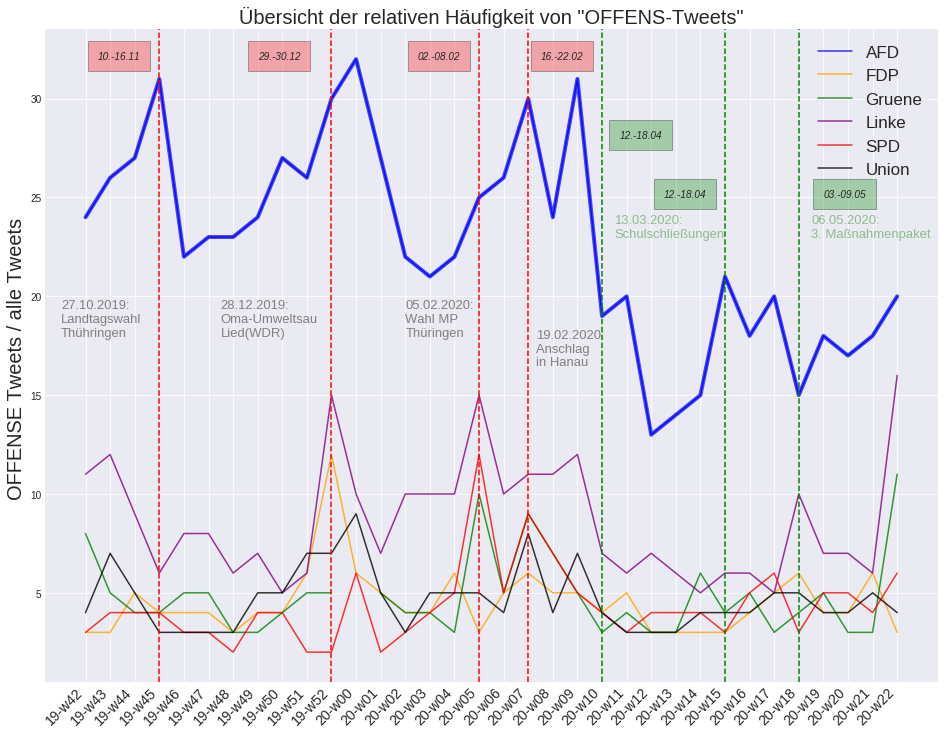

In [81]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']

fig = plt.figure(figsize = (16, 12))
ax = fig.add_subplot(111)

num=0
for column in partei_piv_rel:
    ax.plot(partei_piv_rel.index, partei_piv_rel[column], color = my_palette[num], alpha=0.8, label = column)
    num+=1

ax.plot(partei_piv_rel.index, partei_piv_rel['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)
#ax.plot(partei_piv_rel.index, partei_piv_rel['full_text']['SPD'], marker='', color='red', linewidth=4, alpha=0.7)
#ax.plot(partei_piv_rel.index, partei_piv_rel['full_text']['Linke'], marker='', color='purple', linewidth=4, alpha=0.7)
#ax.plot(partei_piv_rel.index, partei_piv_rel['full_text']['FDP'], marker='', color='orange', linewidth=4, alpha=0.7)

ax.set_title('Übersicht der relativen Häufigkeit von "OFFENS-Tweets"', size = 20)
ylab = ax.set_ylabel('OFFENSE Tweets / alle Tweets ', size = 20)
# = ax.set_xlabel('Datum', size = 20)
plt.legend(loc = 1, ncol = 1, fontsize = 17)

#x_tags
x_tags = plt.xticks(partei_piv_rel.index, fontsize = 14, rotation = 45, ha = "right")



# Verdeutlichungen in der Grafik
ax.axvline('19-w45', ls='--', color='r')
ax.text(0.5, 32, '10.-16.11', style='italic', bbox={'facecolor': 'red', 'alpha': 0.3, 'pad': 10})
ax.text(-1, 18, '27.10.2019:\nLandtagswahl\nThühringen', color='grey', fontsize=13)

ax.axvline('19-w52', ls='--', color='r')
ax.text(7, 32, '29.-30.12', style='italic', bbox={'facecolor': 'red', 'alpha': 0.3, 'pad': 10})
ax.text(5.5, 18, '28.12.2019:\nOma-Umweltsau\nLied(WDR)', color='grey', fontsize=13)

ax.axvline('20-w05', ls='--', color='r')
ax.text(13.5, 32, '02.-08.02', style='italic', bbox={'facecolor': 'red', 'alpha': 0.3, 'pad': 10})
ax.text(13, 18, '05.02.2020:\nWahl MP \nThüringen', color='grey', fontsize=13)

ax.axvline('20-w07', ls='--', color='r')
ax.text(18.5, 32, '16.-22.02', style='italic', bbox={'facecolor': 'red', 'alpha': 0.3, 'pad': 10})
ax.text(18.3, 16.5, '19.02.2020:\nAnschlag \nin Hanau', color='grey', fontsize=13)

ax.axvline('20-w10', ls='--', color='g')
ax.text(21.7, 28, '12.-18.04', style='italic', bbox={'facecolor': 'green', 'alpha': 0.3, 'pad': 10})
ax.text(21.5, 23, '13.03.2020:\nSchulschließungen', color='darkseagreen', fontsize=13)

ax.axvline('20-w15', ls='--', color='g')
ax.text(23.5, 25, '12.-18.04', style='italic', bbox={'facecolor': 'green', 'alpha': 0.3, 'pad': 10})


ax.axvline('20-w18', ls='--', color='g')
ax.text(30, 25, '03.-09.05', style='italic', bbox={'facecolor': 'green', 'alpha': 0.3, 'pad': 10})
ax.text(29.5, 23, '06.05.2020:\n3. Maßnahmenpaket', color='darkseagreen', fontsize=13)


In [ ]:
print(sent_df_Wien.loc[(sent_df_Wien['week'] == '20-w03')]['date'].min())
print(sent_df_Wien.loc[(sent_df_Wien['week'] == '20-w03')]['date'].max())

### Absolute Übersicht

In [82]:
mdp_partei = sent_df_Wien[['user_party', 'week', 'date', 'user_screen_name', 'full_text', 'predict']]
mdp_partei = mdp_partei.loc[(mdp_partei['predict'] == 'OFFENSE') & (mdp_partei['date'] >= datetime.date(2019,10,25))]
partei_piv = pd.pivot_table(mdp_partei, columns = ['user_party'], index = ['week'], aggfunc = np.count_nonzero)

Text(29.5, 100, '06.05.2020:\n3. Maßnahmenpaket')

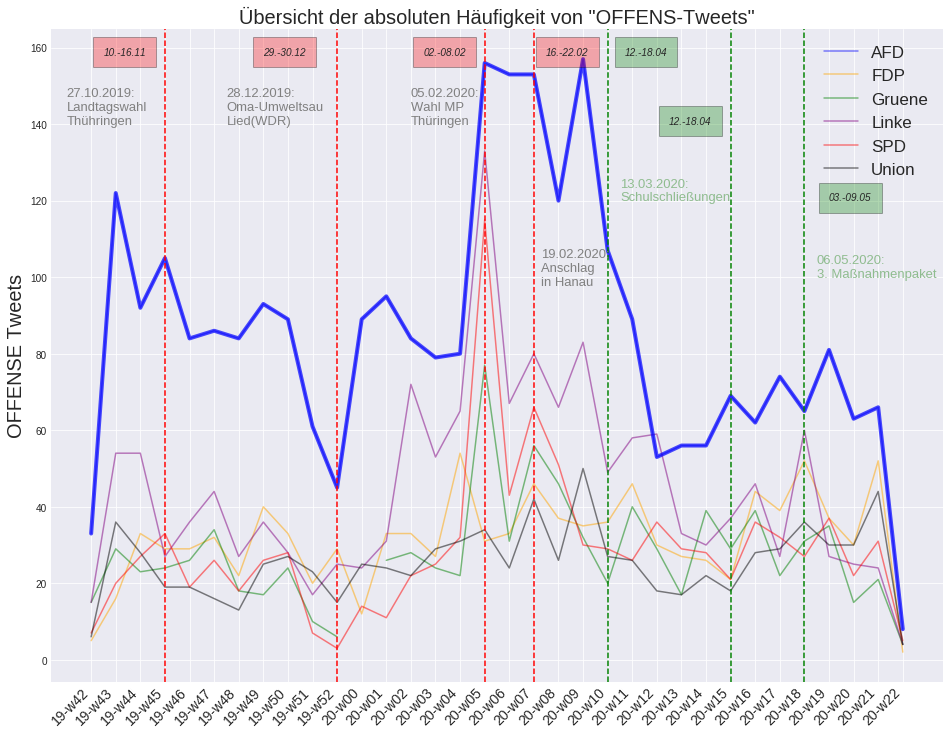

In [83]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']

fig = plt.figure(figsize = (16, 12))
ax = fig.add_subplot(111)

num=0
for column in partei_piv['full_text']:
    ax.plot(partei_piv.index, partei_piv['full_text'][column], color = my_palette[num], alpha=0.5, label = column)
    num+=1

ax.plot(partei_piv.index, partei_piv['full_text']['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)
#ax.plot(partei_piv.index, partei_piv['full_text']['SPD'], marker='', color='red', linewidth=4, alpha=0.7)
#ax.plot(partei_piv.index, partei_piv['full_text']['Linke'], marker='', color='purple', linewidth=4, alpha=0.7)
#ax.plot(partei_piv.index, partei_piv['full_text']['FDP'], marker='', color='orange', linewidth=4, alpha=0.7)
#ax.plot(partei_piv.index, partei_piv['full_text']['Union'], marker='', color='black', linewidth=4, alpha=0.7)
#ax.plot(partei_piv.index, partei_piv['full_text']['Gruene'], marker='', color='green', linewidth=4, alpha=0.7)

ax.set_title('Übersicht der absoluten Häufigkeit von "OFFENS-Tweets"', size = 20)
ylab = ax.set_ylabel('OFFENSE Tweets', size = 20)
# = ax.set_xlabel('Datum', size = 20)
plt.legend(loc = 1, ncol = 1, fontsize = 17)

#x_tags
x_tags = plt.xticks(partei_piv.index, fontsize = 14, rotation = 45, ha = "right")


# Verdeutlichungen in der Grafik
ax.axvline('19-w45', ls='--', color='r')
ax.text(0.5, 158, '10.-16.11', style='italic', bbox={'facecolor': 'red', 'alpha': 0.3, 'pad': 10})
ax.text(-1, 140, '27.10.2019:\nLandtagswahl\nThühringen', color='grey', fontsize=13)

ax.axvline('19-w52', ls='--', color='r')
ax.text(7, 158, '29.-30.12', style='italic', bbox={'facecolor': 'red', 'alpha': 0.3, 'pad': 10})
ax.text(5.5, 140, '28.12.2019:\nOma-Umweltsau\nLied(WDR)', color='grey', fontsize=13)

ax.axvline('20-w05', ls='--', color='r')
ax.text(13.5, 158, '02.-08.02', style='italic', bbox={'facecolor': 'red', 'alpha': 0.3, 'pad': 10})
ax.text(13, 140, '05.02.2020:\nWahl MP \nThüringen', color='grey', fontsize=13)

ax.axvline('20-w07', ls='--', color='r')
ax.text(18.5, 158, '16.-22.02', style='italic', bbox={'facecolor': 'red', 'alpha': 0.3, 'pad': 10})
ax.text(18.3, 98, '19.02.2020:\nAnschlag \nin Hanau', color='grey', fontsize=13)

ax.axvline('20-w10', ls='--', color='g')
ax.text(21.7, 158, '12.-18.04', style='italic', bbox={'facecolor': 'green', 'alpha': 0.3, 'pad': 10})
ax.text(21.5, 120, '13.03.2020:\nSchulschließungen', color='darkseagreen', fontsize=13)

ax.axvline('20-w15', ls='--', color='g')
ax.text(23.5, 140, '12.-18.04', style='italic', bbox={'facecolor': 'green', 'alpha': 0.3, 'pad': 10})


ax.axvline('20-w18', ls='--', color='g')
ax.text(30, 120, '03.-09.05', style='italic', bbox={'facecolor': 'green', 'alpha': 0.3, 'pad': 10})
ax.text(29.5, 100, '06.05.2020:\n3. Maßnahmenpaket', color='darkseagreen', fontsize=13)



### Anteil der OFFENSE Tweets über den gesammten Datensatz hinweg

In [84]:
mdp_partei = sent_df_Wien[['user_party', 'month', 'user_screen_name', 'full_text', 'predict']]
# mdp_partei = mdp_partei[mdp_partei['predict'] == 'OFFENSE']
partei_piv_perc = pd.pivot_table(mdp_partei, columns = ['predict'], index = ['user_party'], aggfunc = np.count_nonzero)
partei_piv_perc['full_text']

predict,OFFENSE,OTHER
user_party,,
AFD,3942,13153
FDP,1401,30558
Gruene,1226,24506
Linke,2054,21605
SPD,1274,28392
Union,1112,24149


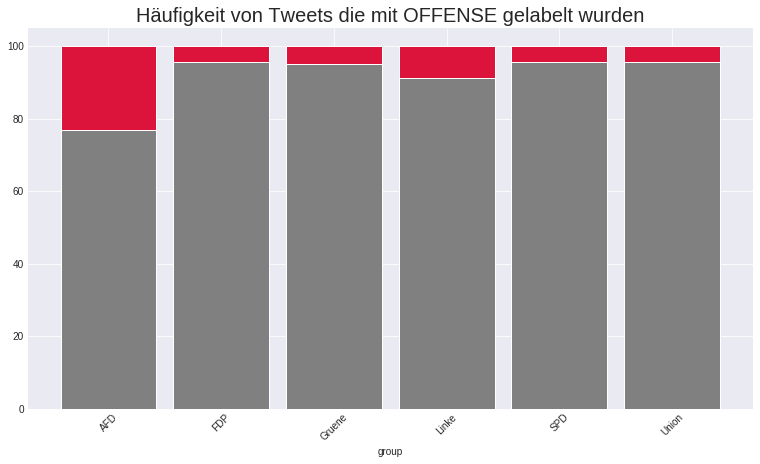

In [85]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
# r = [0,1,2,3,4]
raw_data = {'greenBars': partei_piv_perc['full_text']['OTHER'].values, 'orangeBars': partei_piv_perc['full_text']['OFFENSE'].values}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
barWidth = 0.85
names = partei_piv_perc['full_text'].index
fig = plt.figure(figsize = (13, 7))
ax = fig.add_subplot(111)

# Create green Bars
ax.bar(partei_piv_perc['full_text'].index, greenBars, color='grey', edgecolor='white', width=barWidth)
# Create orange Bars
ax.bar(partei_piv_perc['full_text'].index, orangeBars, bottom=greenBars, color='crimson', edgecolor='white', width=barWidth)

ax.set_title('Häufigkeit von Tweets die mit OFFENSE gelabelt wurden', size = 20)
# Custom x axis
plt.xticks(names, rotation =45)
plt.xlabel("group")
 
# Show graphic
plt.show()

# Zeitraum Ansichten

### Oma Umweltsau Lied (WDR) am 28.12.2019

In [147]:
mdp_partei = sent_df_Wien[['user_party', 'week', 'date', 'user_screen_name', 'full_text', 'predict']]

# Zähler
mdp_WDR_nom = mdp_partei.loc[(mdp_partei['predict'] == 'OFFENSE') 
                                & (mdp_partei['date'] >= datetime.date(2019,12,24)) 
                                & (mdp_partei['date'] <= datetime.date(2020,1,11))]

WDR_piv_nom = pd.pivot_table(mdp_WDR_nom, columns = ['user_party'], index = ['date'], aggfunc = np.count_nonzero)
WDR_piv_nom = WDR_piv_nom['full_text']

# Nenner
mdp_WDR_denom = mdp_partei.loc[(mdp_partei['date'] >= datetime.date(2019,12,24)) 
                                  & (mdp_partei['date'] <= datetime.date(2020,1,11))]
WDR_piv_denom = pd.pivot_table(mdp_WDR_denom, columns = ['user_party'], index = ['date'], aggfunc = np.count_nonzero)
WDR_piv_denom = WDR_piv_denom['full_text']

# Relative Werte
WDR_piv_rel = (WDR_piv_nom/WDR_piv_denom) * 100
WDR_piv_rel = WDR_piv_rel.round()
#WDR_piv_rel = WDR_piv_nom

Text(0.54, 0.07, ' @FELIANNE1 @zardorak @ArminLaschet\nMan kann halt auch blind und taub sein.\nVor Ort wurde u. a. ein Lied mit antisem. Verschwörungen \n("Vereinigten Staaten die in Israels Auftrag die Welt versklaven") \nvorgetragen. \nUnd auf dem Bild unten sind keine Omas und Opas, \nsondern Nazi-Hooligans. \nhttps://t.co/ilbGy1ReKq')

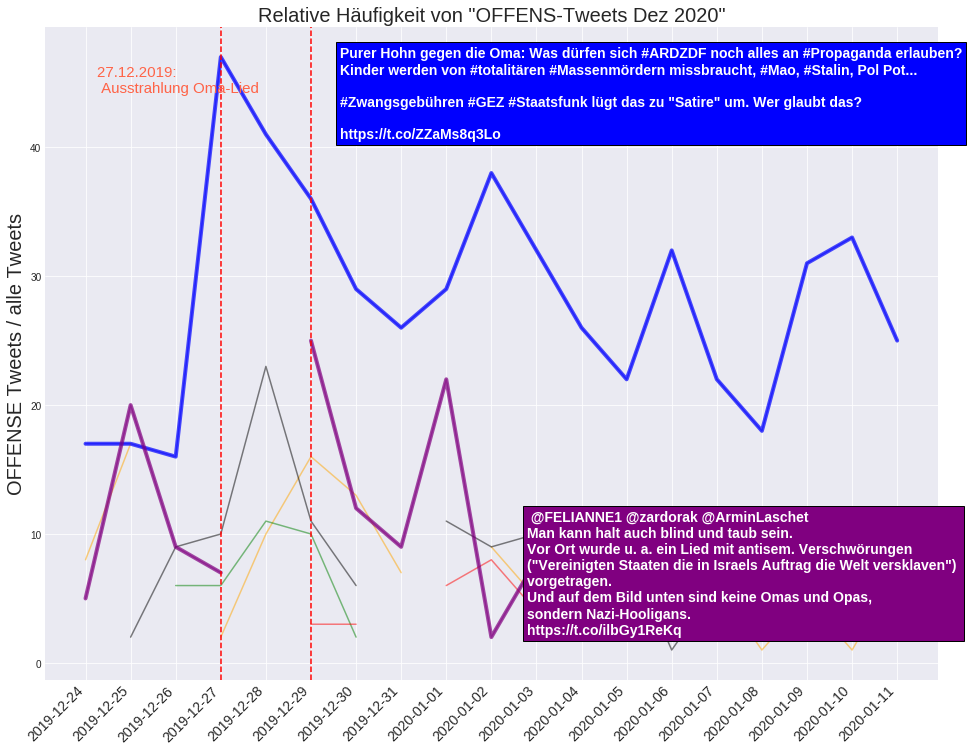

In [148]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']

fig = plt.figure(figsize = (16, 12))
ax = fig.add_subplot(111)

num=0
for column in WDR_piv_rel:
    ax.plot(WDR_piv_rel.index, WDR_piv_rel[column], color = my_palette[num], alpha=0.5, label = column)
    num+=1

ax.plot(WDR_piv_rel.index, WDR_piv_rel['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)
ax.plot(WDR_piv_rel.index, WDR_piv_rel['Linke'], marker='', color='purple', linewidth=4, alpha=0.7)

ax.set_title('Relative Häufigkeit von "OFFENS-Tweets Dez 2020"', size = 20)
ylab = ax.set_ylabel('OFFENSE Tweets / alle Tweets', size = 20)
# = ax.set_xlabel('Datum', size = 20)
#plt.legend(loc = 1, ncol = 2, fontsize = 17)

#x_tags
x_tags = plt.xticks(WDR_piv_rel.index, fontsize = 14, rotation = 45, ha = "right")

# # Verdeutlichungen in der Grafik
ax.axvline(datetime.date(2019,12,27), ls='--', color='r')
ax.text(0.058, 0.9, '27.12.2019: \n Ausstrahlung Oma-Lied', color='tomato', fontsize=15, transform=ax.transAxes)
ax.text(0.33, 0.83, 'Purer Hohn gegen die Oma: Was dürfen sich #ARDZDF noch alles an #Propaganda erlauben?\nKinder werden von #totalitären #Massenmördern missbraucht, #Mao, #Stalin, Pol Pot...\n\n#Zwangsgebühren #GEZ #Staatsfunk lügt das zu "Satire" um. Wer glaubt das?\n\nhttps://t.co/ZZaMs8q3Lo', 
        color='w', weight = 'bold', fontsize = 14, bbox={'facecolor': 'blue'}, transform=ax.transAxes)


ax.axvline(datetime.date(2019,12,29), ls='--', color='r')
ax.text(0.54, 0.07, ' @FELIANNE1 @zardorak @ArminLaschet\nMan kann halt auch blind und taub sein.\nVor Ort wurde u. a. ein Lied mit antisem. Verschwörungen \n("Vereinigten Staaten die in Israels Auftrag die Welt versklaven") \nvorgetragen. \nUnd auf dem Bild unten sind keine Omas und Opas, \nsondern Nazi-Hooligans. \nhttps://t.co/ilbGy1ReKq', 
        color='w', weight = 'bold', fontsize = 14, bbox={'facecolor': 'purple'}, transform=ax.transAxes)


In [126]:
pd.set_option('display.max_colwidth', None)
sent_df_Wien.loc[(sent_df_Wien['date'] == datetime.date(2019,12,29)) 
                 & (sent_df_Wien['user_party'] == 'Linke')
                 & (sent_df_Wien['predict'] == 'OFFENSE')
                ]['full_text']

1862                                  @sybille_zeisel @EinAugenschmaus @Hauptgarnix Mein Sohn ist 19, seine Oma u Opa, meine Eltern, aber auch beide Großeltern väterlicherseits, haben den Krieg erlebt. Ich hatte 10 Jahre nach seiner Geburt mehrere Fehlgeburten. Diese Kinder wären heute 9 Jahre alt, u hätten auch Kriegsgroßeltern.
2145                                                                                            Für alle Hater: Die letzte Zeile des #Umweltsau-Liedes ist: "Meine Oma ist doch keine Umweltsau". Ich wiederhole: "Meine Oma ist doch keine Umweltsau."\nSo, nun Schnappatmung beenden, entspannen und aufs neue Jahr freuen. \n#WDR #koeln
2149                                                                                                                                                                                                                     @rektumpeter @tauss Natürlich sind das Nazis. Man muss schon blind auf dem rechten Auge sein, dass nicht zu sehen.
2152

### Thüringen MP Wahl am 05.02.2020

In [86]:
mdp_partei = sent_df_Wien[['user_party', 'week', 'date', 'user_screen_name', 'full_text', 'predict']]

# Zähler
mdp_TW_nom = mdp_partei.loc[(mdp_partei['predict'] == 'OFFENSE') 
                                & (mdp_partei['date'] >= datetime.date(2020,1,13)) 
                                & (mdp_partei['date'] <= datetime.date(2020,2,14))]

TW_piv_nom = pd.pivot_table(mdp_TW_nom, columns = ['user_party'], index = ['date'], aggfunc = np.count_nonzero)
TW_piv_nom = TW_piv_nom['full_text']

# Nenner
mdp_TW_denom = mdp_partei.loc[(mdp_partei['date'] >= datetime.date(2020,1,13)) 
                                  & (mdp_partei['date'] <= datetime.date(2020,2,14))]
TW_piv_denom = pd.pivot_table(mdp_TW_denom, columns = ['user_party'], index = ['date'], aggfunc = np.count_nonzero)
TW_piv_denom = TW_piv_denom['full_text']

# Relative Werte
TW_piv_rel = (TW_piv_nom/TW_piv_denom) * 100
TW_piv_rel = TW_piv_rel.round()
#TW_piv_rel = TW_piv_nom

Text(0.71, 0.75, '05.02.2020:\nWahl MP \nThüringen')

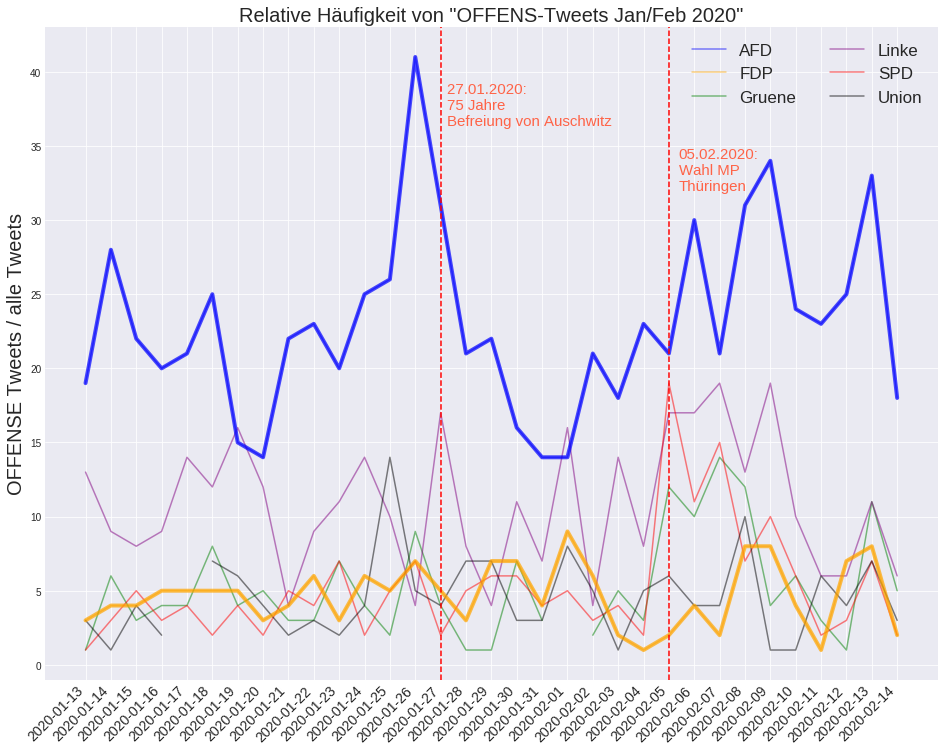

In [87]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']

fig = plt.figure(figsize = (16, 12))
ax = fig.add_subplot(111)

num=0
for column in TW_piv_rel:
    ax.plot(TW_piv_rel.index, TW_piv_rel[column], color = my_palette[num], alpha=0.5, label = column)
    num+=1

ax.plot(TW_piv_rel.index, TW_piv_rel['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)
ax.plot(TW_piv_rel.index, TW_piv_rel['FDP'], marker='', color='orange', linewidth=4, alpha=0.7)

ax.set_title('Relative Häufigkeit von "OFFENS-Tweets Jan/Feb 2020"', size = 20)
ylab = ax.set_ylabel('OFFENSE Tweets / alle Tweets', size = 20)
# = ax.set_xlabel('Datum', size = 20)
plt.legend(loc = 1, ncol = 2, fontsize = 17)

#x_tags
x_tags = plt.xticks(TW_piv_rel.index, fontsize = 14, rotation = 45, ha = "right")

# # Verdeutlichungen in der Grafik
ax.axvline(datetime.date(2020,1,27), ls='--', color='r')
ax.text(0.45, 0.85, '27.01.2020: \n75 Jahre \nBefreiung von Auschwitz', color='tomato', fontsize=15, transform=ax.transAxes)

ax.axvline(datetime.date(2020,2,5), ls='--', color='r')
ax.text(0.71, 0.75, '05.02.2020:\nWahl MP \nThüringen', color='tomato', fontsize=15, transform=ax.transAxes)


Text(0.72, 0.77, '05.02.2020:\nWahl MP \nThüringen')

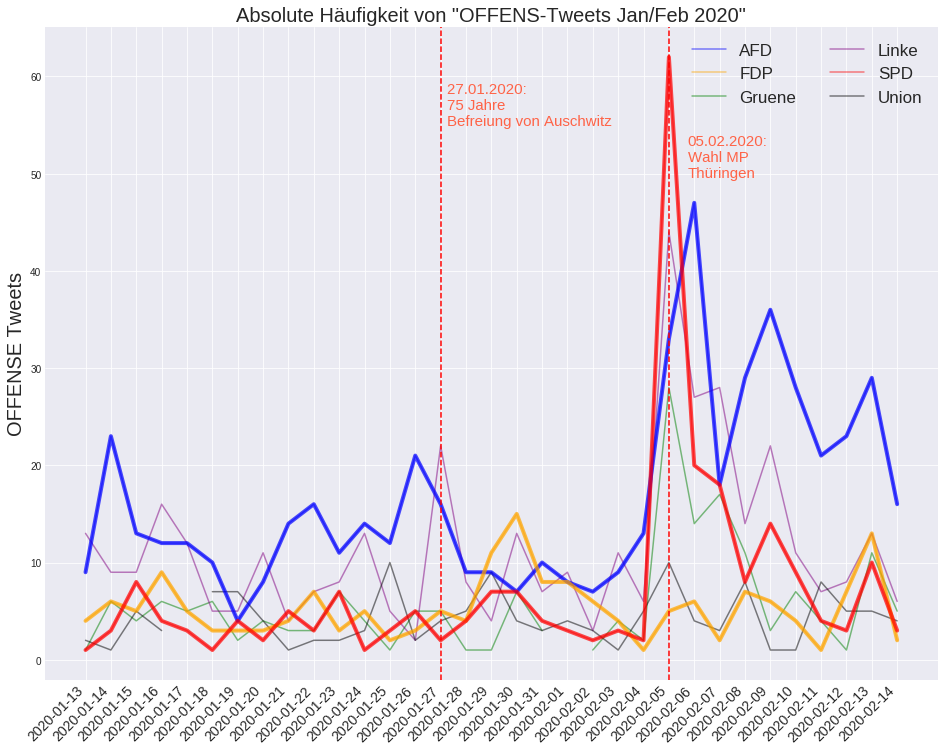

In [88]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']

fig = plt.figure(figsize = (16, 12))
ax = fig.add_subplot(111)

num=0
for column in TW_piv_nom:
    ax.plot(TW_piv_nom.index, TW_piv_nom[column], color = my_palette[num], alpha=0.5, label = column)
    num+=1

ax.plot(TW_piv_nom.index, TW_piv_nom['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)
ax.plot(TW_piv_nom.index, TW_piv_nom['FDP'], marker='', color='orange', linewidth=4, alpha=0.7)
ax.plot(TW_piv_nom.index, TW_piv_nom['SPD'], marker='', color='red', linewidth=4, alpha=0.7)

ax.set_title('Absolute Häufigkeit von "OFFENS-Tweets Jan/Feb 2020"', size = 20)
ylab = ax.set_ylabel('OFFENSE Tweets', size = 20)
# = ax.set_xlabel('Datum', size = 20)
plt.legend(loc = 1, ncol = 2, fontsize = 17)

#x_tags
x_tags = plt.xticks(TW_piv_nom.index, fontsize = 14, rotation = 45, ha = "right")

# # Verdeutlichungen in der Grafik
ax.axvline(datetime.date(2020,1,27), ls='--', color='r')
ax.text(0.45, 0.85, '27.01.2020: \n75 Jahre \nBefreiung von Auschwitz', color='tomato', fontsize=15, transform=ax.transAxes)

ax.axvline(datetime.date(2020,2,5), ls='--', color='r')
ax.text(0.72, 0.77, '05.02.2020:\nWahl MP \nThüringen', color='tomato', fontsize=15, transform=ax.transAxes)


### Anschlag in Hanau am 19.02.2020

In [89]:
mdp_partei = sent_df_Wien[['user_party', 'week', 'date', 'user_screen_name', 'full_text', 'predict']]

# Zähler
mdp_Hanau_nom = mdp_partei.loc[(mdp_partei['predict'] == 'OFFENSE') 
                                & (mdp_partei['date'] >= datetime.date(2020,2,15)) 
                                & (mdp_partei['date'] <= datetime.date(2020,3,1))]

Hanau_piv_nom = pd.pivot_table(mdp_Hanau_nom, columns = ['user_party'], index = ['date'], aggfunc = np.count_nonzero)
Hanau_piv_nom = Hanau_piv_nom['full_text']

# Nenner
mdp_Hanau_denom = mdp_partei.loc[(mdp_partei['date'] >= datetime.date(2020,2,15)) 
                                  & (mdp_partei['date'] <= datetime.date(2020,3,1))]
Hanau_piv_denom = pd.pivot_table(mdp_Hanau_denom, columns = ['user_party'], index = ['date'], aggfunc = np.count_nonzero)
Hanau_piv_denom = Hanau_piv_denom['full_text']

# Relative Werte
Hanau_piv_rel = (Hanau_piv_nom/Hanau_piv_denom) * 100
Hanau_piv_rel = Hanau_piv_rel.round()
# Hanau_piv_rel

Text(0.28, 0.5, '19.02.2020: Anschlag von Hanau')

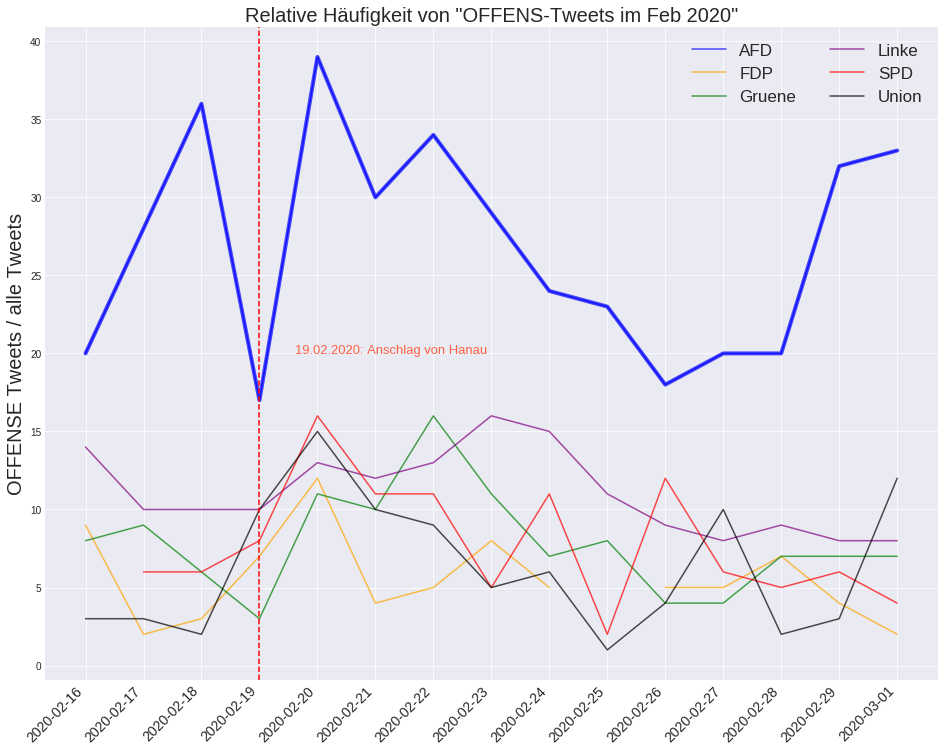

In [90]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']

fig = plt.figure(figsize = (16, 12))
ax = fig.add_subplot(111)

num=0
for column in Hanau_piv_rel:
    ax.plot(Hanau_piv_rel.index, Hanau_piv_rel[column], color = my_palette[num], alpha=0.7, label = column)
    num+=1

ax.plot(Hanau_piv_rel.index, Hanau_piv_rel['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)

ax.set_title('Relative Häufigkeit von "OFFENS-Tweets im Feb 2020"', size = 20)
ylab = ax.set_ylabel('OFFENSE Tweets / alle Tweets', size = 20)
# = ax.set_xlabel('Datum', size = 20)
plt.legend(loc = 1, ncol = 2, fontsize = 17)

#x_tags
x_tags = plt.xticks(Hanau_piv_rel.index, fontsize = 14, rotation = 45, ha = "right")

ax.axvline(datetime.date(2020,2,19), ls='--', color='r')
ax.text(0.28, 0.5, '19.02.2020: Anschlag von Hanau', color='tomato', fontsize=13, transform=ax.transAxes)


Text(0.01, 0.95, '19.02.2020: Anschlag von Hanau')

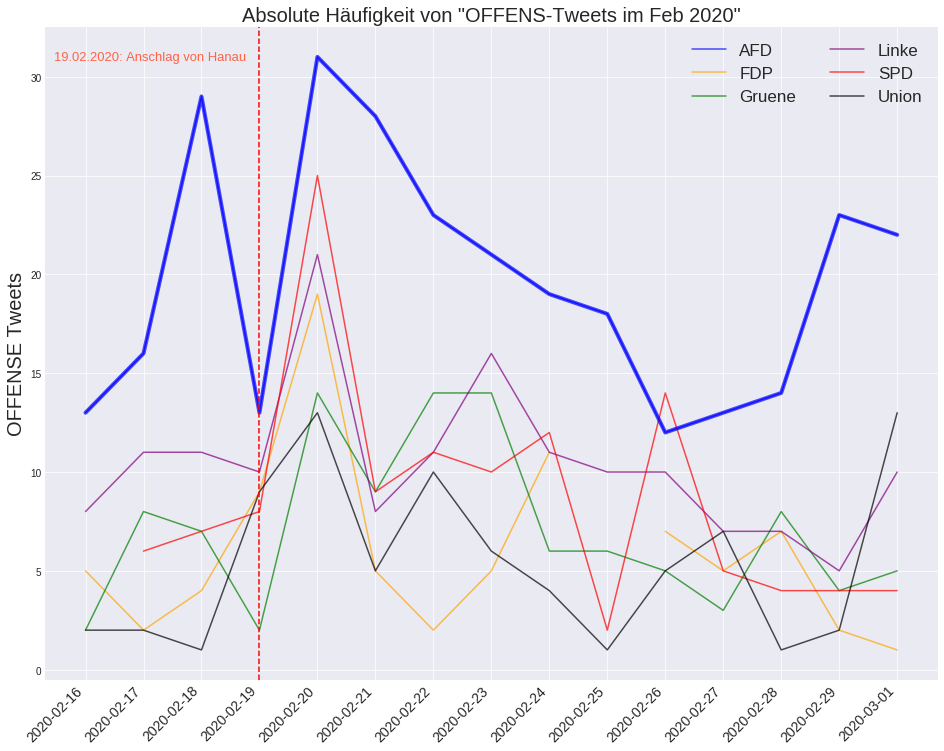

In [91]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']

fig = plt.figure(figsize = (16, 12))
ax = fig.add_subplot(111)

num=0
for column in Hanau_piv_nom:
    ax.plot(Hanau_piv_nom.index, Hanau_piv_nom[column], color = my_palette[num], alpha=0.7, label = column)
    num+=1

ax.plot(Hanau_piv_nom.index, Hanau_piv_nom['AFD'], marker='', color='blue', linewidth=4, alpha=0.7)

ax.set_title('Absolute Häufigkeit von "OFFENS-Tweets im Feb 2020"', size = 20)
ylab = ax.set_ylabel('OFFENSE Tweets', size = 20)
# = ax.set_xlabel('Datum', size = 20)
plt.legend(loc = 1, ncol = 2, fontsize = 17)

#x_tags
x_tags = plt.xticks(Hanau_piv_nom.index, fontsize = 14, rotation = 45, ha = "right")

ax.axvline(datetime.date(2020,2,19), ls='--', color='r')
ax.text(0.01, 0.95, '19.02.2020: Anschlag von Hanau', color='tomato', fontsize=13, transform=ax.transAxes)


# Detail Suchen im Datensatz

In [ ]:
# pd.set_option('display.max_rows', 0)
pd.set_option('display.max_rows', 500)

#mdp_partei = sample_df[['user_party', 'week', 'user_screen_name', 'predict']]
# mdp_partei = mdp_partei[mdp_partei['predict'] == 'OFFENSE']
partei_piv_name = pd.pivot_table(mdp_partei, columns = ['predict'], index = ['user_party','user_screen_name'], aggfunc = np.count_nonzero)
partei_piv_name

In [110]:
pd.set_option('display.max_colwidth', None)
import datetime
# sent_df_Wien[sent_df_Wien['user_screen_name'] == 'StBrandner']
sent_df_Wien.loc[(sent_df_Wien['date'] == datetime.date(2019,12,27)) 
                 & (sent_df_Wien['user_party'] == 'Union')
                 & (sent_df_Wien['predict'] == 'OFFENSE')
                ]['full_text']
# sent_df_Wien.loc[(sent_df_Wien['week'] == '20-w22') 
#                  & (sent_df_Wien['user_party'] == 'Gruene')
#                  & (sent_df_Wien['predict'] == 'OFFENSE')
#                 ].tail(200)

3397                 Der #Hype um Robert Habeck ist bemerkenswert. Für mich ist #RobertHabeck der #Bergdokter der deutschen #Politik. Jeder weiß, dass der Bergdoktor medizinisch nichts drauf hat &amp; dennoch will jeder mal von ihm behandelt werden...#CDU #Grüne #Bundestag @BILD
3557                                                                          Ich kaufe seit Jahren keine Böller für mich und fahre eigentlich nie schneller als 130 auf der Autobahn. Trotzdem geht mir diese ganze Verbotsorgie gegen den Strich #nurmalso #Tempolimit #Boellerverbot
7525                                  @GYGeorg @Luisamneubauer @Siemens @JoeKaeser Sie sind ziemlich unziemlich! Deshalb ist schwer, auf solche Unsachlichkeit einzugehen. Ausgangspunkt war der "Wahnsinn" von Frau N.-, klar, daß Sie sie verteidigen müssen, ist aber durchschaubar.
7773                                                                                  Gegen #Hass und #Hetze müssen alle Demokraten parteiübergreifend zusammenh